# Analysing Data

In [47]:

import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

In [8]:
df = pd.read_csv('data/health_data.csv')
df_visual = pd.read_csv('data/health_data.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
df.shape

(500, 4)

In [6]:
df.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [11]:
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
df_visual['Status'] = df_visual.apply(convert_status_to_description,axis=1)
df_visual.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [12]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
df_visual['gender_lbl'] = df_visual.apply(convert_gender_to_label,axis=1)
df_visual.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


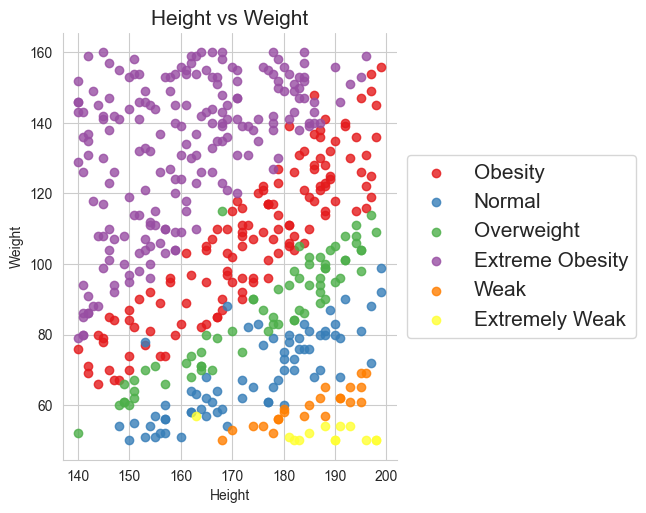

In [16]:
sns.set_style('whitegrid')
sns.lmplot( x='Height', y='Weight', data=df_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

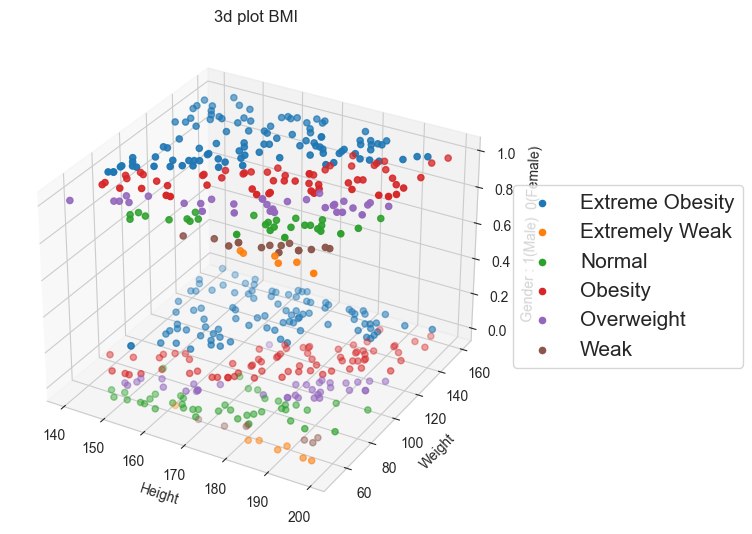

In [17]:
groups = df_visual.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

In [18]:

people = df_visual['Gender'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Gender
Female    255
Male      245
Name: count, dtype: int64

In [19]:
categories = df_visual['Status'].value_counts() 
categories

Status
Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: count, dtype: int64

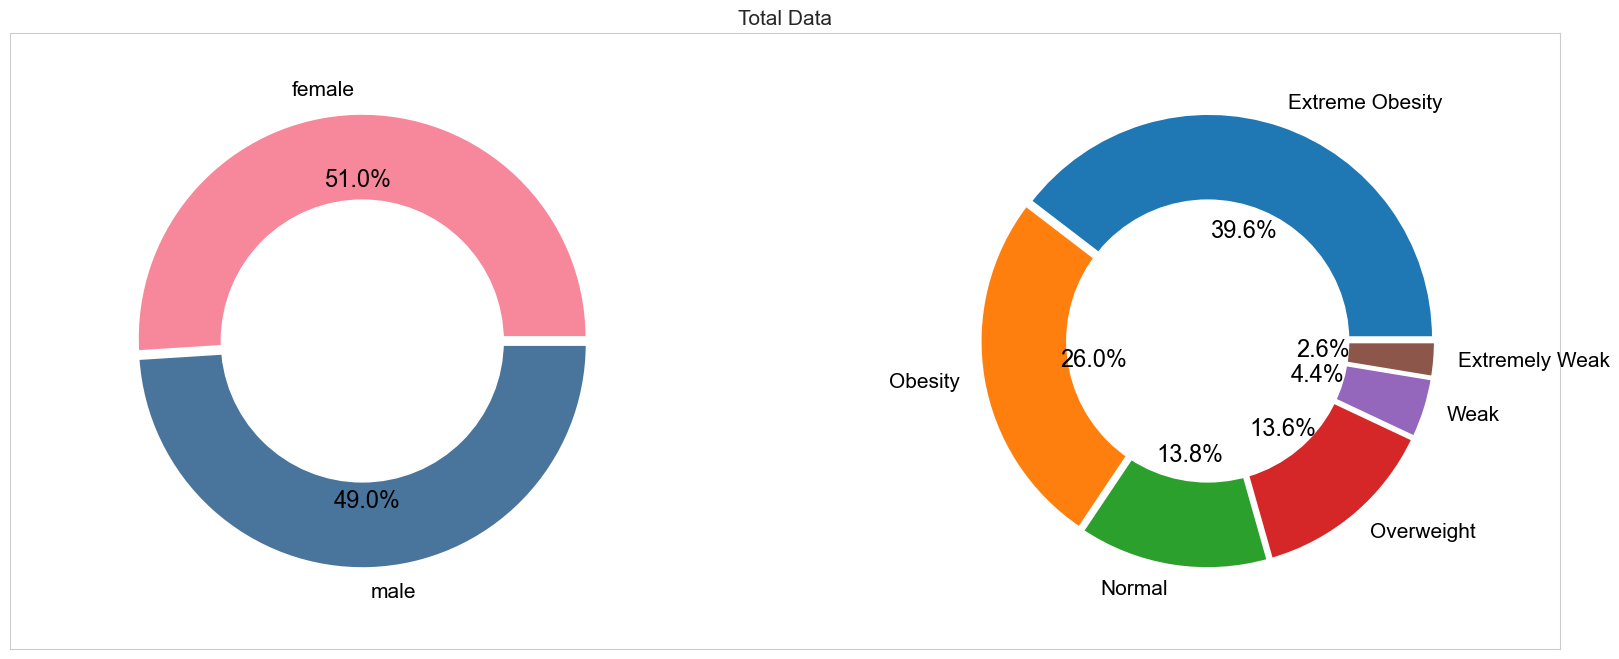

In [20]:
fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

In [21]:
df_visual_male = df_visual[df_visual['Gender']=='Male']
df_visual_male.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
4,Male,149,61,3,Overweight,1
5,Male,189,104,3,Overweight,1
6,Male,147,92,5,Extreme Obesity,1


In [22]:
df_visual_male_categories = df_visual_male['Status'].value_counts()
df_visual_male_categories

Status
Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: count, dtype: int64

In [23]:
df_visual_female = df_visual[df_visual['Gender']=='Female']
df_visual_female.head()

,Gender,Height,Weight,Index,Status,gender_lbl
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
9,Female,169,103,4,Obesity,0
11,Female,159,80,4,Obesity,0
12,Female,192,101,3,Overweight,0


In [25]:
df_visual_female_categories = df_visual_female['Status'].value_counts()
df_visual_female_categories

Status
Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Weak                7
Extremely Weak      7
Name: count, dtype: int64

Text(0, 0, 'Male')

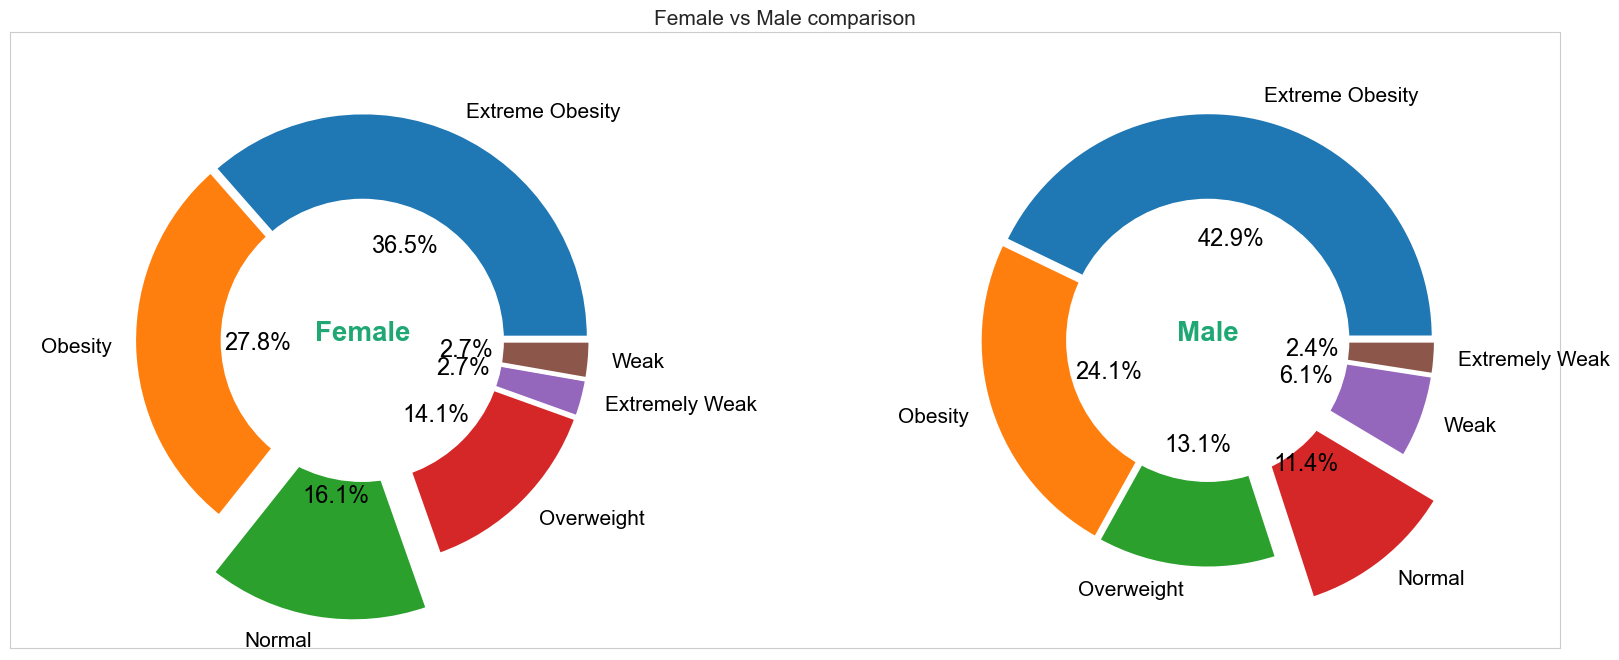

In [26]:
fig = plt.figure(figsize=(20,8))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.2,0.01,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(df_visual_female_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Extremely Weak','Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(df_visual_male_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')


# Machine Learning

In [30]:
le = LabelEncoder()
df = pd.DataFrame(df)

df['Gender'] = le.fit_transform(df['Gender'])
df.sample(10)

,Gender,Height,Weight,Index
357,0,186,143,5
302,1,188,81,2
375,0,150,144,5
430,0,178,79,2
130,0,168,139,5
207,0,196,122,4
227,1,188,123,4
298,0,187,92,3
340,0,155,71,3
387,0,160,83,4


In [32]:
#feature scaling
std_sc = StandardScaler()
df.iloc[:,0:-1] = std_sc.fit_transform(df.iloc[:,0:-1])
df.head()

,Gender,Height,Weight,Index
0,1.020204,0.247939,-0.309117,4
1,1.020204,1.164872,-0.587322,2
2,-0.980196,0.920357,0.123647,4
3,-0.980196,1.531645,-0.061823,3
4,1.020204,-1.280283,-1.391027,3


In [34]:
#splitting data into training and testing sets
X = df.drop(columns=['Index'])
Y = df['Index']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [36]:
#ensemble Learning (Random Forest Classification)
model = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

# Predict Results

In [37]:
y_pred_rfc = model.predict(x_test)

# Accuracy Measurements

In [39]:
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[ 3,  0,  1,  0,  0,  0],
       [ 0,  7,  1,  0,  0,  0],
       [ 0,  0, 11,  0,  1,  0],
       [ 0,  0,  1, 15,  1,  0],
       [ 0,  0,  0,  2, 25,  6],
       [ 0,  0,  0,  0,  0, 51]], dtype=int64)

In [41]:
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_acc*100

89.60000000000001


# Calculation of optimal number of trees in Random Forest

In [42]:
def trees_in_forest_vs_acc(trees, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [43]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000]
acc_scores_for_trees_RFC = []
for x in trees_list_for_randomForest:
    acc_scores_for_trees_RFC.append(trees_in_forest_vs_acc(x))
acc_scores_for_trees_RFC

[0.88, 0.896, 0.896, 0.888, 0.888, 0.896]

,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,0.880
1,200,0.896
2,300,0.896
3,500,0.888
4,700,0.888


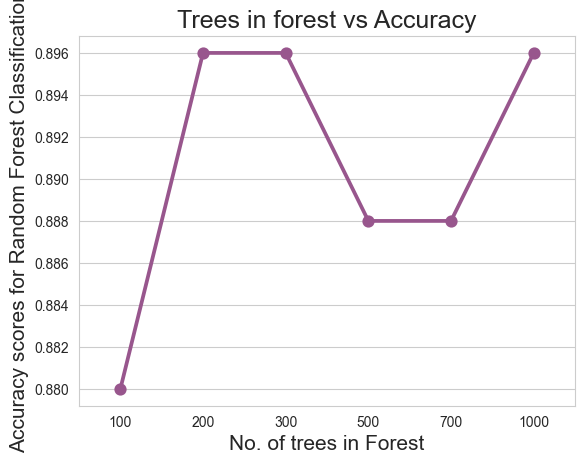

In [44]:
tree_vs_acc = pd.DataFrame({'No. of trees in Forest':trees_list_for_randomForest,
              'Accuracy scores for Random Forest Classification':acc_scores_for_trees_RFC})


sns.pointplot(x='No. of trees in Forest',y='Accuracy scores for Random Forest Classification',data=tree_vs_acc,color='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)


tree_vs_acc.head()

# Code snippet for testing other person's Health Status based on the above model

In [45]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    y_pred = model.predict(df)
    
    if y_pred == 0:
        return 'Extremely Weak'
    elif y_pred == 1:
        return 'Weak'
    elif y_pred == 2:
        return 'Normal'
    elif y_pred == 3:
        return 'Overweight'
    elif y_pred == 4:
        return 'Obesity'
    elif y_pred == 5:
        return 'Extreme Obesity'

In [46]:
config = {
    'Gender': [1], # 1- Male, 2- Female
    'Height': [177],
    'Weight': [188]
}

predict_mpg(config, model)

'Obesity'

# Create Model File

In [48]:
# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 89.60 %


In [49]:
##loading the model from the saved file
pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predictValue = predict_mpg(config, model)
predictValue

'Obesity'